# Problem 1 (40 pts):




In [67]:
from google.colab import drive
drive.mount('/content/drive')

csv_dir = "/content/drive/My Drive/ECGR4106-RealTimeAI/hw2/housing.csv"

Mounted at /content/drive


In [68]:
import pandas as pd

housing = pd.read_csv(csv_dir, index_col=False)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [69]:
# # mapping index
# df['mainroad'] = df['mainroad'].map({'yes':1 ,'no':0})
# df['guestroom'] = df['guestroom'].map({'yes':1 ,'no':0})
# df['basement'] = df['basement'].map({'yes':1 ,'no':0})
# df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1 ,'no':0})
# df['airconditioning'] = df['airconditioning'].map({'yes':1 ,'no':0})
# df['prefarea'] = df['prefarea'].map({'yes':1 ,'no':0})
# df['furnishingstatus'] = df['furnishingstatus'].map({'furnished':1 ,'semi-furnished':2, 'unfurnished':0})
# df.head()

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
df = housing[num_vars] 
df.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [70]:
# copy the date
df_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,area,bedrooms,bathrooms,stories,parking,price
0,0.458025,0.666667,0.50,0.75,0.666667,1.000000
1,0.553086,0.666667,1.00,1.00,1.000000,0.921053
2,0.614815,0.500000,0.50,0.50,0.666667,0.921053
3,0.462963,0.666667,0.50,0.50,1.000000,0.918421
4,0.458025,0.666667,0.25,0.50,0.666667,0.857895
...,...,...,...,...,...,...
540,0.185185,0.333333,0.25,0.25,0.666667,0.136842
541,0.148148,0.500000,0.25,0.25,0.000000,0.132868
542,0.223457,0.333333,0.25,0.25,0.000000,0.131579
543,0.179630,0.500000,0.25,0.25,0.000000,0.131579


In [71]:
from sklearn.model_selection import train_test_split


# # drop 'price' as target and everything else will be features
# feature = df.drop('price', axis = 1).values
# target = df['price'].values

# feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=29)

Newtrain, Newtest = train_test_split(df_max_scaled, train_size = 0.8, test_size = 0.2, random_state = 29)

target_Newtrain = Newtrain.pop('price')
feature_Newtrain = Newtrain
target_Newtest = Newtest.pop('price')
feature_Newtest = Newtest

In [72]:
import torch
import torch.nn.functional as F
from torch import nn

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# torch.cuda.get_device_name(0)

# df to tensor
# feature_train = torch.FloatTensor(feature_train)
# feature_test = torch.FloatTensor(feature_test)
# target_train = torch.FloatTensor(target_train)
# target_test = torch.FloatTensor(target_test)

feature_train = torch.tensor(feature_Newtrain.values).float()
feature_test = torch.tensor(feature_Newtest.values).float()
target_train = torch.tensor(target_Newtrain.values).float().unsqueeze(-1)
target_test = torch.tensor(target_Newtest.values).float().unsqueeze(-1)


> 1. Build a fully connected neural network for the housing dataset you did in previous homework. For training and validation use 80% (training) and 20% (validation) split. For this part, only use one hidden layer with 8 nodes. Train your network for 200 epochs. Report your training time, training loss, and evaluation accuracy after 200 epochs. Analyze your results in your report. Make sure to submit your code by providing the
 GitHub URL of your course repository for this course. (15pts)

In [73]:
# from collections import OrderedDict

# model = nn.Sequential(OrderedDict([
#             ('hidden', nn.Linear(len(num_vars)-1,8)), #Hidden Layer 1
#             ('activation', nn.Tanh()),
#             ('output', nn.Linear(8,1)) #Outer Layer
# ]))
# model


# ================================================ #
model1a = nn.Sequential(
    nn.Linear(len(num_vars)-1, 8),  # hidden layer 1
    nn.Tanh(),  # activate function tanh
    nn.Linear(8, 1),  # ouput
    # nn.Sigmoid()
)
print(model1a)

Sequential(
  (0): Linear(in_features=5, out_features=8, bias=True)
  (1): Tanh()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


> 2. Extend your network with two more additional hidden layers, like the example we did in lecture. Train your network for 200 epochs. Report your training time, training loss, and evaluation accuracy after 200 epochs. Analyze your results in your report. Make sure to submit your code by providing the GitHub URL of your course repository for this course. Analyze your results in your report and compare your model size and accuracy over the baseline implementation in Problem1. a. Do you see any over-fitting? Make sure to submit your code by providing the GitHub URL of your course repository for this course. (25pts)

In [74]:
# ================================================ #
model1b = nn.Sequential(
    nn.Linear(len(num_vars)-1, 6),  # hidden layer 1
    nn.Tanh(),  # activate function tanh
    nn.Linear(6, 4),  # hidden layer 2
    nn.Tanh(),  
    nn.Linear(4, 2),  # hidden layer 3
    nn.Tanh(),  
    nn.Linear(2, 1),  # ouput
    # nn.Sigmoid()
)
print(model1b)

Sequential(
  (0): Linear(in_features=5, out_features=6, bias=True)
  (1): Tanh()
  (2): Linear(in_features=6, out_features=4, bias=True)
  (3): Tanh()
  (4): Linear(in_features=4, out_features=2, bias=True)
  (5): Tanh()
  (6): Linear(in_features=2, out_features=1, bias=True)
)


In [75]:
# collecting weights and biases using model.parameters()
[param.shape for param in model1b.parameters() ]

# explanatory names for submodule
for name, param in model1b.named_parameters():
    print(name, param.shape)

# accessing particular parameters using submodules as atributes
# model.output.bias
model1a[2].bias

0.weight torch.Size([6, 5])
0.bias torch.Size([6])
2.weight torch.Size([4, 6])
2.bias torch.Size([4])
4.weight torch.Size([2, 4])
4.bias torch.Size([2])
6.weight torch.Size([1, 2])
6.bias torch.Size([1])


Parameter containing:
tensor([0.0305], requires_grad=True)

In [76]:
from matplotlib import pyplot as plt

# training loop to return Epoch and Cost Values
def training_loop(n_epochs, optimizer, model, loss_fn, x_T, x_V, y_T, y_V):

    # main training loop for both training set and validation set
    for epoch in range(0, n_epochs + 1):
        t_p_T = model(x_T)
        loss_T = loss_fn(t_p_T, y_T)
        
        t_p_V = model(x_V)
        
        loss_V = loss_fn(t_p_V, y_V)

        # passing optimizer and loss function
        optimizer.zero_grad()
        loss_T.backward()
        optimizer.step()
        
        # printing out Epochs and Loss
        if epoch % 10 == 0:
          print(f"Epoch {epoch}, Training Loss is {loss_T.item():.4f}, "
          f"Validation Loss is {loss_V.item():.4f}")
          
    #     loss_T_arr = [0.0] * 200
    #     loss_T_arr = loss_T_arr.append(loss_T)
    #     loss_V_arr = [0.0] * 200
    #     loss_V_arr = loss_V_arr.append(loss_V)

    # return loss_T_arr, loss_V_arr

In [77]:
import torch.optim as optim

# now testing neural network with a learing rate at 0.001 with hidden features and 1 layer

training_loop(
    n_epochs = 200,
    optimizer = optim.SGD(model1b.parameters(), lr = 1e-3),
    model = model1b,
    loss_fn = nn.MSELoss(), #This replaces the loss function from earlier
    x_T = feature_train,
    x_V = feature_test,
    y_T = target_train,
    y_V = target_test
    )

# print('output', model(feature_test))
# print('answer', target_test)
# print('hidden', model.fc1.weight.grad)

Epoch 0, Training Loss is 0.7305, Validation Loss is 0.7499
Epoch 10, Training Loss is 0.6749, Validation Loss is 0.6937
Epoch 20, Training Loss is 0.6237, Validation Loss is 0.6417
Epoch 30, Training Loss is 0.5764, Validation Loss is 0.5938
Epoch 40, Training Loss is 0.5328, Validation Loss is 0.5495
Epoch 50, Training Loss is 0.4925, Validation Loss is 0.5086
Epoch 60, Training Loss is 0.4554, Validation Loss is 0.4709
Epoch 70, Training Loss is 0.4211, Validation Loss is 0.4360
Epoch 80, Training Loss is 0.3894, Validation Loss is 0.4038
Epoch 90, Training Loss is 0.3602, Validation Loss is 0.3740
Epoch 100, Training Loss is 0.3332, Validation Loss is 0.3465
Epoch 110, Training Loss is 0.3084, Validation Loss is 0.3211
Epoch 120, Training Loss is 0.2854, Validation Loss is 0.2976
Epoch 130, Training Loss is 0.2642, Validation Loss is 0.2759
Epoch 140, Training Loss is 0.2446, Validation Loss is 0.2559
Epoch 150, Training Loss is 0.2266, Validation Loss is 0.2373
Epoch 160, Training

In [78]:
# # plot  
# # loss_test, loss_train = training_loop(loss_T, loss_V)

# fig = plt.figure(dpi=100)
# plt.xlabel("Epochs")
# plt.ylabel("Loss")

# plt.plot(loss_V_arr.detach().numpy(), '.', label="Validation")
# plt.plot(loss_T_arr.detach().numpy(), '.', label="Training")
# plt.legend()

# Problem 2 (60 pts):





1. Create a fully connected Neural Network for all 10 classes in CIFAR-10 with only one hidden layer with the size of 512. Train your network for 200 epochs. Report your training time, training loss and evaluation accuracy after 200 epochs. Analyze your results in your report. Make sure to submit your code by providing the GitHub URL of your course repository for this course. (25pt)

In [50]:
import matplotlib.pyplot as plt  
import torch
import torch.nn as nn
import torch.optim as optim

In [51]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

from torchvision import datasets

data_path = 'CIFAR'
cifar10_train = datasets.CIFAR10(data_path, train = True, download = True) 
cifar10_test = datasets.CIFAR10(data_path, train = False, download = True) 

print(len(cifar10_train))
print(len(cifar10_test))

Files already downloaded and verified
Files already downloaded and verified
50000
10000


In [52]:
img, label = cifar10_train[99]

img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FD1302F8190>,
 1,
 'automobile')

In [53]:
# PIL images to PyTorch
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [54]:
tensor_cifar10_train = datasets.CIFAR10(data_path, train = True, download = False, transform = transforms.ToTensor())

img_t, _ = tensor_cifar10_train[99]
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

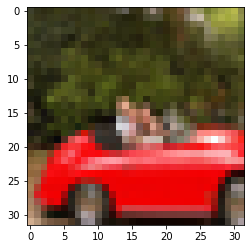

In [55]:
plt.imshow(img_t.permute(1,2,0))
plt.show()

In [56]:
# Normalizing tensor images
transformed_cifar10_train = datasets.CIFAR10(data_path, train = True, download = False, 
                                             transform = transforms.Compose([
                                                                             transforms.ToTensor(), 
                                                                             transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470, 0.2435, 0.2616))
                                                                             ]
                                                                            )
                                             )
img_t, _ = tensor_cifar10_train[99]

# plt.imshow(img_t.permute(1,2,0))
# plt.show()

In [57]:
cifar10_train = datasets.CIFAR10(data_path, train = True, download = False, 
                             transform = transforms.Compose([
                                                             transforms.ToTensor(), 
                                                             transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470, 0.2435, 0.2616))
                                                             ]))

cifar10_test = datasets.CIFAR10(data_path, train = False, download = False, 
                             transform = transforms.Compose([
                                                             transforms.ToTensor(),
                                                             transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470, 0.2435, 0.2616))
                                                             ]))

In [58]:
label_map = {0: 0, 2: 1}

cifar10_newtrain = [(img, label_map[label]) for img, label in cifar10_train if label in [0,2]]
cifar10_newtest = [(img, label_map[label]) for img, label in cifar10_test if label in [0,2]]

In [59]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [62]:
train_loader = torch.utils.data.DataLoader(cifar10_newtrain, batch_size = 64, shuffle =False)
val_loader = torch.utils.data.DataLoader(cifar10_newtest, batch_size=64, shuffle=False)

model2a = nn.Sequential(
            nn.Linear(3072, 512), #Hidden Layer 1
            nn.Tanh(),
            nn.Linear(512, 2), #Output Layer
            nn.LogSoftmax(dim = 1))

model2a.to(device)

Sequential(
  (0): Linear(in_features=3072, out_features=512, bias=True)
  (1): Tanh()
  (2): Linear(in_features=512, out_features=2, bias=True)
  (3): LogSoftmax(dim=1)
)

In [64]:
learning_rate = 1e-2
optimizer = optim.SGD(model2a.parameters(), lr = learning_rate)

loss_fn = nn.NLLLoss()
n_epochs = 200

for epoch in range(n_epochs + 1):
  for imgs, labels in train_loader:
    imgs, labels = imgs.to(device), labels.to(device) #Used for GPU
    batch_size = imgs.shape[0]
    outputs = model2a(imgs.view(batch_size, -1))
    loss = loss_fn(outputs, labels)
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
  if epoch % 10 == 0:
    print("Epoch: %d, Training Loss: %f" % (epoch, float(loss)))  

Epoch: 0, Training Loss: 0.285458
Epoch: 10, Training Loss: 0.122038
Epoch: 20, Training Loss: 0.052608
Epoch: 30, Training Loss: 0.026766
Epoch: 40, Training Loss: 0.015452
Epoch: 50, Training Loss: 0.009215
Epoch: 60, Training Loss: 0.006043
Epoch: 70, Training Loss: 0.004266
Epoch: 80, Training Loss: 0.003212
Epoch: 90, Training Loss: 0.002559
Epoch: 100, Training Loss: 0.002127
Epoch: 110, Training Loss: 0.001824
Epoch: 120, Training Loss: 0.001598
Epoch: 130, Training Loss: 0.001424
Epoch: 140, Training Loss: 0.001285
Epoch: 150, Training Loss: 0.001170
Epoch: 160, Training Loss: 0.001073
Epoch: 170, Training Loss: 0.000990
Epoch: 180, Training Loss: 0.000919
Epoch: 190, Training Loss: 0.000856
Epoch: 200, Training Loss: 0.000800


In [66]:
# train_loader2a = torch.utils.data.DataLoader(cifar10_newtrain, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        
        imgs, labels = imgs.to(device), labels.to(device) 
        batch_size = imgs.shape[0]
        outputs = model2a(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim = 1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Training Accuracy: %f" % (correct / total))

Training Accuracy: 1.000000


In [65]:
# val_loader2a = torch.utils.data.DataLoader(cifar10_newtest, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        
        imgs, labels = imgs.to(device), labels.to(device) 
        batch_size = imgs.shape[0]
        outputs = model2a(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim = 1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Validation Accuracy: %f" % (correct / total))

Validation Accuracy: 0.813500


2. Extend your network with two more additional hidden layers, like the example we did in lecture. Train your network for 200 epochs. Report your training time, loss, and evaluation accuracy after 200 epochs. Analyze your results in your report and compare your model size and accuracy over the baseline implementation in Problem1. a. Do you see any over-fitting? Make sure to submit your code by providing the GitHub URL of your course repository for this course. (35pt)


In [79]:
model2b = nn.Sequential(
            nn.Linear(3072, 1024), #Hidden Layer 1
            nn.Tanh(),
            nn.Linear(1024, 512), #Hidden Layer 2
            nn.Tanh(),
            nn.Linear(512, 128), #Hidden Layer 3
            nn.Tanh(),
            nn.Linear(128, 2)) #Output Layer

model2b.to(device)


Sequential(
  (0): Linear(in_features=3072, out_features=1024, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1024, out_features=512, bias=True)
  (3): Tanh()
  (4): Linear(in_features=512, out_features=128, bias=True)
  (5): Tanh()
  (6): Linear(in_features=128, out_features=2, bias=True)
)

In [80]:


learning_rate = 1e-2
optimizer = optim.SGD(model2b.parameters(), lr = learning_rate)

loss_fn = nn.CrossEntropyLoss()
n_epochs = 200

for epoch in range(n_epochs + 1):
    for imgs, labels in train_loader:
        
        imgs, labels = imgs.to(device), labels.to(device) # to GPU
        batch_size = imgs.shape[0]
        outputs = model2b(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if epoch % 10 == 0:
      print("Epoch: %d, Training Loss: %f" % (epoch, float(loss)))  

Epoch: 0, Training Loss: 0.787299
Epoch: 10, Training Loss: 0.527168
Epoch: 20, Training Loss: 0.232282
Epoch: 30, Training Loss: 0.052824
Epoch: 40, Training Loss: 0.013029
Epoch: 50, Training Loss: 0.002018
Epoch: 60, Training Loss: 0.001679
Epoch: 70, Training Loss: 0.000408
Epoch: 80, Training Loss: 0.000220
Epoch: 90, Training Loss: 0.000148
Epoch: 100, Training Loss: 0.000105
Epoch: 110, Training Loss: 0.000078
Epoch: 120, Training Loss: 0.000060
Epoch: 130, Training Loss: 0.000048
Epoch: 140, Training Loss: 0.000040
Epoch: 150, Training Loss: 0.000034
Epoch: 160, Training Loss: 0.000030
Epoch: 170, Training Loss: 0.000027
Epoch: 180, Training Loss: 0.000024
Epoch: 190, Training Loss: 0.000022
Epoch: 200, Training Loss: 0.000020


In [48]:
# train_loader2b = torch.utils.data.DataLoader(cifar10_newtrain, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        
        imgs, labels = imgs.to(device), labels.to(device) 
        batch_size = imgs.shape[0]
        outputs = model2b(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim = 1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Training Accuracy: %f" % (correct / total))

Training Accuracy: 1.000000


In [49]:
# val_loader2b = torch.utils.data.DataLoader(cifar10_newtest, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        
        imgs, labels = imgs.to(device), labels.to(device) 
        batch_size = imgs.shape[0]
        outputs = model2b(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim = 1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Validation Accuracy: %f" % (correct / total))

Validation Accuracy: 0.804500
